In [1]:
# create dataframe
# picked the features
# figure out which figures are representative and valid
# find summery stats for each feature
# check for dataleakage with each feature
# select which features we want to use in our model
# create test/train split
# create three models using logistics regression, random forest, and discision tree
# validate/optimize the model

In [2]:
#Import dependencies and read in data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ps
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import make_classification
from collections import Counter
import pydotplus
import os
from IPython.display import Image


df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
pd.options.display.max_columns = None
display(df)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
#checking Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
#look at dataframe
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
#sort dataframe for diabetes_binary, highbp, highchol, cholcheck, bmi, smoker, stroke, heart deseaseor attack, physactivity, fruits, veggies, hvyalcoholcunsump, genhealth, menthealth, physhealth, diffwalk, sex, education
diabetes_df = df[['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education']]
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0


In [6]:
file_name = 'diabetes_df.csv'
if not os.path.exists(file_name):
    df.to_csv(file_name, index=False)
    print(f"File '{file_name}' has been created.")
else:
    print(f"File '{file_name}' already exists.")

File 'diabetes_df.csv' already exists.


In [7]:
#0= no
#1= yes
diabetes_df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [8]:
#0= no
#1= yes
diabetes_df['HighChol'].value_counts()

HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

In [9]:
diabetes_df['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

In [10]:
diabetes_df['BMI'].value_counts()

BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64

In [11]:
#0= no
#1= yes
diabetes_df['CholCheck'].value_counts()

CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64

In [12]:
#0= no
#1= yes
diabetes_df['Smoker'].value_counts()

Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64

In [13]:
#0= no
#1= yes
diabetes_df['Stroke'].value_counts()

Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64

In [14]:
#0= no
#1= yes
diabetes_df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [15]:
#0= no
#1= yes
diabetes_df['PhysActivity'].value_counts()

PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64

In [16]:
#0= no
#1= yes
diabetes_df['Fruits'].value_counts()

Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64

In [17]:
#0= no
#1= yes
diabetes_df['Veggies'].value_counts()

Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64

In [18]:
#0= no consumption
#1= heavy consumption
diabetes_df['HvyAlcoholConsump'].value_counts()

HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64

In [19]:
#scale of of health 1-5 1 being the best
diabetes_df['GenHlth'].value_counts()

GenHlth
2.0    89084
3.0    75646
1.0    45299
4.0    31570
5.0    12081
Name: count, dtype: int64

In [20]:
#how many days in the past 30 was your health not good
diabetes_df['MentHlth'].value_counts()

MentHlth
0.0     175680
2.0      13054
30.0     12088
5.0       9030
1.0       8538
3.0       7381
10.0      6373
15.0      5505
4.0       3789
20.0      3364
7.0       3100
25.0      1188
14.0      1167
6.0        988
8.0        639
12.0       398
28.0       327
21.0       227
29.0       158
18.0        97
9.0         91
16.0        88
27.0        79
22.0        63
17.0        54
26.0        45
11.0        41
13.0        41
23.0        38
24.0        33
19.0        16
Name: count, dtype: int64

In [21]:
#how many days in the past 30 was your health not good
diabetes_df['PhysHlth'].value_counts()

PhysHlth
0.0     160052
30.0     19400
2.0      14764
1.0      11388
3.0       8495
5.0       7622
10.0      5595
15.0      4916
4.0       4542
7.0       4538
20.0      3273
14.0      2587
25.0      1336
6.0       1330
8.0        809
21.0       663
12.0       578
28.0       522
29.0       215
9.0        179
18.0       152
16.0       112
27.0        99
17.0        96
24.0        72
22.0        70
26.0        69
13.0        68
11.0        60
23.0        56
19.0        22
Name: count, dtype: int64

In [22]:
#0= no
#1= yes
diabetes_df['DiffWalk'].value_counts()

DiffWalk
0.0    211005
1.0     42675
Name: count, dtype: int64

In [23]:
#0= female
#1= male
diabetes_df['Sex'].value_counts()

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64

In [24]:
#1=18-24
#9=60-64
#13=80 and up
diabetes_df['Age'].value_counts()

Age
9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: count, dtype: int64

In [25]:
#1=never attended school/only kindergarden
#6=colledge grad 
diabetes_df['Education'].value_counts()

Education
6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

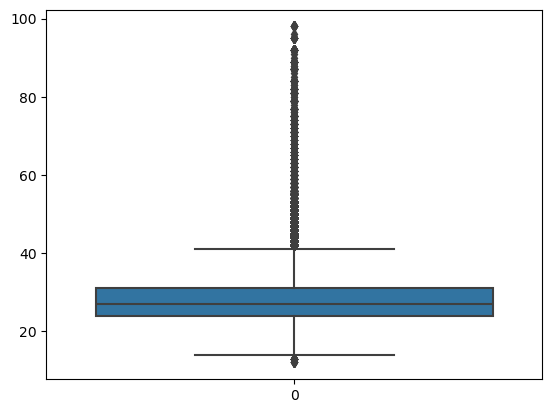

In [26]:
#check outliers and decide wheather to keep them or get rid of them 
sns.boxplot(diabetes_df['BMI'])
plt.show

In [27]:
#count null values
diabetes_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
dtype: int64

In [28]:
# Split training and testing sets
# Create the features DataFrame, X
X = diabetes_df.copy()
X = X.drop(columns='Diabetes_binary')

# Create the target DataFrame, y
y = diabetes_df['Diabetes_binary']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
# Review the X_train DataFrame
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
220454,0.0,0.0,1.0,34.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0
212219,1.0,1.0,1.0,31.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,0.0,20.0,0.0,0.0,7.0,4.0
142306,0.0,0.0,1.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,30.0,25.0,1.0,0.0,9.0,6.0
31799,1.0,1.0,1.0,20.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,5.0,4.0,1.0,0.0,8.0,5.0
199344,0.0,1.0,1.0,36.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,10.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205970,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2.0,15.0,1.0,0.0,4.0,5.0
216327,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,5.0,0.0,0.0,0.0,2.0,4.0
51499,1.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,5.0
144842,0.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,4.0,6.0


In [30]:
# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression()


In [31]:
# Fit the model
logistic_regression_model.fit(X_train, y_train)

c:\Users\josht\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)}")

Training Data Score: 0.8627194365604962
Testing Data Score: 0.8613844213181961


In [33]:
# Generate predictions from the model we just fit
predictions = logistic_regression_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
results_df

,Prediction,Actual
220454,0.0,1.0
212219,0.0,0.0
142306,0.0,0.0
31799,0.0,0.0
199344,0.0,0.0
...,...,...
205970,0.0,0.0
216327,0.0,0.0
51499,0.0,1.0
144842,0.0,0.0


In [34]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

In [35]:
# Display the results DataFrame
results_df

,Testing Data Predictions,Testing Data Actual Targets
50428,0.0,1.0
165315,0.0,0.0
162863,0.0,0.0
50032,0.0,0.0
72605,1.0,1.0
...,...,...
182831,0.0,0.0
236290,0.0,0.0
168192,1.0,1.0
60851,0.0,0.0


In [36]:

# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)



0.8613844213181961

In [37]:
# Create a confusion matrix
print(confusion_matrix(y_test,testing_predictions, labels=[1,0]))

[[ 1372  7584]
 [ 1207 53257]]


In [38]:

# Create a classification report
print(classification_report(y_test, testing_predictions, labels = [1, 0]))

# logistic regrssion model with no edits aside from variables outliers exist in bmi no resampling techniques used model has high accuracy but seems to predict more 0's than 1's

              precision    recall  f1-score   support

           1       0.53      0.15      0.24      8956
           0       0.88      0.98      0.92     54464

    accuracy                           0.86     63420
   macro avg       0.70      0.57      0.58     63420
weighted avg       0.83      0.86      0.83     63420



In [39]:
# Split training and testing sets
# Create the features DataFrame, X
X = diabetes_df.copy()
X = X.drop(columns='Diabetes_binary')

# Create the target DataFrame, y
y = diabetes_df['Diabetes_binary']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
# Create an undersampler
rus = RandomUnderSampler(random_state=42)

In [41]:
# Fit and transform the data to create a balanced dataset
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [42]:
# Check the class distribution after undersampling
print(f"Resampled class distribution: {Counter(y_resampled)}")

Resampled class distribution: Counter({0.0: 26500, 1.0: 26500})


In [43]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)


0.8622201198360139

In [44]:
# Create a confusion matrix
print(confusion_matrix(y_test,testing_predictions, labels=[1,0]))

[[ 1368  7478]
 [ 1260 53314]]


In [45]:
# Create a classification report
print(classification_report(y_test, testing_predictions, labels = [1, 0]))
# logistics regression model that used undersampling pretty much the same as the model before no changes where seen in precision recall and accuracy

              precision    recall  f1-score   support

           1       0.52      0.15      0.24      8846
           0       0.88      0.98      0.92     54574

    accuracy                           0.86     63420
   macro avg       0.70      0.57      0.58     63420
weighted avg       0.83      0.86      0.83     63420



In [46]:
# Split training and testing sets
# Create the features DataFrame, X
X = diabetes_df.copy()
X = X.drop(columns='Diabetes_binary')

# Create the target DataFrame, y
y = diabetes_df['Diabetes_binary']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
# Define target vector
y = diabetes_df["Diabetes_binary"].values.reshape(-1, 1)
y[:5]


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [48]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [49]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

# Fit the model
model = model.fit(X_train, y_train)



In [50]:
# Making predictions using the testing data
predictions = model.predict(X_test)



In [51]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

print(f"Accuracy Score : {acc_score}")



Accuracy Score : 0.8033270261747083


In [52]:
# Create a confusion matrix
print(confusion_matrix(y_test,testing_predictions, labels=[1,0]))

[[  356  8566]
 [ 2272 52226]]


In [53]:
# Create a classification report
print(classification_report(y_test, testing_predictions, labels = [1, 0]))
# decision tree model with no resampleing techniques model was not as good as logistics regression

              precision    recall  f1-score   support

           1       0.14      0.04      0.06      8922
           0       0.86      0.96      0.91     54498

    accuracy                           0.83     63420
   macro avg       0.50      0.50      0.48     63420
weighted avg       0.76      0.83      0.79     63420



In [54]:
# # Create DOT data
# dot_data = tree.export_graphviz(
#     model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
# )

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)

# # Show graph
# Image(graph.create_png())

In [55]:
# Define features set
X = diabetes_df.copy()
X.drop("Diabetes_binary", axis=1, inplace=True)
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0


In [56]:
# Define target set
y = diabetes_df["Diabetes_binary"].ravel()
y[:5]

C:\Users\josht\AppData\Local\Temp\ipykernel_54488\2739638843.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = diabetes_df["Diabetes_binary"].ravel()


array([0., 0., 0., 0., 0.])

In [57]:
# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [58]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [59]:
# Fit the model
rf_model = rf_model.fit(X_train, y_train)

In [60]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test)

In [61]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [62]:
# Create a confusion matrix
print(confusion_matrix(y_test,testing_predictions, labels=[1,0]))

[[  356  8566]
 [ 2272 52226]]


In [63]:
# Create a classification report
print(classification_report(y_test, testing_predictions, labels = [1, 0]))
# random forest model better then logistics at finding 0's but overall precision and recall are bad

              precision    recall  f1-score   support

           1       0.14      0.04      0.06      8922
           0       0.86      0.96      0.91     54498

    accuracy                           0.83     63420
   macro avg       0.50      0.50      0.48     63420
weighted avg       0.76      0.83      0.79     63420



In [64]:
# Display results
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.854162724692526


In [65]:
# Split training and testing sets
# Create the features DataFrame, X
X = diabetes_df.copy()
X = X.drop(columns='Diabetes_binary')

# Create the target DataFrame, y
y = diabetes_df['Diabetes_binary']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
# Create an undersampler
rus = RandomUnderSampler(random_state=42)

# Fit and transform the data to create a balanced dataset
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [67]:
# Check the class distribution after undersampling
print(f"Resampled class distribution: {Counter(y_resampled)}")

Resampled class distribution: Counter({0.0: 26650, 1.0: 26650})


In [68]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [69]:
# Fit the model
rf_model = rf_model.fit(X_resampled, y_resampled)

In [70]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test)

In [71]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.7056449069694103


In [72]:
# Create a confusion matrix
print(confusion_matrix(y_test,testing_predictions, labels=[1,0]))

[[  341  8355]
 [ 2287 52437]]


In [73]:
# Create a classification report
print(classification_report(y_test, testing_predictions, labels = [1, 0]))
# undersampled random forest same issues as previous model

              precision    recall  f1-score   support

           1       0.13      0.04      0.06      8696
           0       0.86      0.96      0.91     54724

    accuracy                           0.83     63420
   macro avg       0.50      0.50      0.48     63420
weighted avg       0.76      0.83      0.79     63420



In [74]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.1944743651213977, 'BMI'),
 (0.14378958988788795, 'Age'),
 (0.1131681087843058, 'GenHlth'),
 (0.07943274626769092, 'PhysHlth'),
 (0.07874740101205524, 'HighBP'),
 (0.06915124108607813, 'Education'),
 (0.06103100452852097, 'MentHlth'),
 (0.03814194494020134, 'HighChol'),
 (0.031814372324994476, 'Smoker'),
 (0.03174911060059409, 'Fruits')]

In [75]:
#LOGISTIC REGRESSION MODEL WITH LESS FEATURES
#sort dataframe for diabetes_binary, highbp, highchol, cholcheck, bmi, smoker, stroke, heart deseaseor attack, physactivity, fruits, veggies, hvyalcoholcunsump, genhealth, menthealth, physhealth, diffwalk, sex, education
diabetes_edited_df = df[['Diabetes_binary', 'HighBP', 'BMI', 'GenHlth', 'PhysHlth', 'Age', 'Education']]
diabetes_edited_df.head()

,Diabetes_binary,HighBP,BMI,GenHlth,PhysHlth,Age,Education
0,0.0,1.0,40.0,5.0,15.0,9.0,4.0
1,0.0,0.0,25.0,3.0,0.0,7.0,6.0
2,0.0,1.0,28.0,5.0,30.0,9.0,4.0
3,0.0,1.0,27.0,2.0,0.0,11.0,3.0
4,0.0,1.0,24.0,2.0,0.0,11.0,5.0


In [76]:
# Split training and testing sets
# Create the features DataFrame, X
X = diabetes_edited_df.copy()
X = X.drop(columns='Diabetes_binary')

# Create the target DataFrame, y
y = diabetes_edited_df['Diabetes_binary']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [77]:
# Review the X_train DataFrame
X_train

,HighBP,BMI,GenHlth,PhysHlth,Age,Education
101848,0.0,29.0,3.0,0.0,9.0,2.0
191714,0.0,27.0,4.0,10.0,10.0,4.0
9002,0.0,25.0,1.0,0.0,10.0,6.0
181168,1.0,34.0,4.0,10.0,11.0,5.0
129549,1.0,33.0,2.0,0.0,12.0,6.0
...,...,...,...,...,...,...
253429,1.0,26.0,1.0,0.0,7.0,5.0
224027,1.0,31.0,1.0,0.0,11.0,6.0
130648,0.0,28.0,1.0,0.0,11.0,6.0
209362,1.0,24.0,2.0,0.0,11.0,6.0


In [78]:
# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression()

In [79]:
# Fit the model
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [80]:
# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)}")

Training Data Score: 0.8609481761799642
Testing Data Score: 0.8635446231472722


In [81]:
# Generate predictions from the model we just fit
predictions2 = logistic_regression_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
results2_df = pd.DataFrame({"Prediction": predictions2, "Actual": y_train})
results2_df

,Prediction,Actual
101848,0.0,1.0
191714,0.0,0.0
9002,0.0,0.0
181168,0.0,0.0
129549,0.0,1.0
...,...,...
253429,0.0,0.0
224027,0.0,0.0
130648,0.0,0.0
209362,0.0,0.0


In [82]:
# Apply the fitted model to the `test` dataset
testing_predictions2 = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results2_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions2, 
    "Testing Data Actual Targets": y_test})

In [83]:
# Display the results DataFrame
results2_df




,Testing Data Predictions,Testing Data Actual Targets
228567,0.0,0.0
171944,0.0,0.0
48032,0.0,0.0
76331,1.0,0.0
251204,0.0,0.0
...,...,...
121603,0.0,0.0
146300,0.0,0.0
212071,0.0,0.0
75364,0.0,0.0


In [84]:
# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions2)


0.8635446231472722

In [85]:
# Create a confusion matrix
print(confusion_matrix(y_test,testing_predictions2, labels=[1,0]))



[[ 1096  7671]
 [  983 53670]]


In [86]:
# Create a classification report
print(classification_report(y_test, testing_predictions2, labels = [1, 0]))
# logistics regression model with fewer features to test if model gets better with less redundency no changes where seen 

              precision    recall  f1-score   support

           1       0.53      0.13      0.20      8767
           0       0.87      0.98      0.93     54653

    accuracy                           0.86     63420
   macro avg       0.70      0.55      0.56     63420
weighted avg       0.83      0.86      0.83     63420



In [87]:
#LOGISTIC REGRESSION MODEL WITH 3 FEATURES
#sort dataframe for diabetes_binary, highbp, highchol, cholcheck, bmi, smoker, stroke, heart deseaseor attack, physactivity, fruits, veggies, hvyalcoholcunsump, genhealth, menthealth, physhealth, diffwalk, sex, education
diabetes_edited2_df = df[['Diabetes_binary', 'BMI', 'GenHlth', 'Age']]
diabetes_edited2_df.head()


,Diabetes_binary,BMI,GenHlth,Age
0,0.0,40.0,5.0,9.0
1,0.0,25.0,3.0,7.0
2,0.0,28.0,5.0,9.0
3,0.0,27.0,2.0,11.0
4,0.0,24.0,2.0,11.0


In [88]:


# Create the target DataFrame, y
y = diabetes_edited2_df['Diabetes_binary']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Review the X_train DataFrame
X_train

# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression()

# Fit the model
logistic_regression_model.fit(X_train, y_train)



LogisticRegression()

In [89]:
# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)}")


Training Data Score: 0.8622516556291391
Testing Data Score: 0.8597918637653738


In [90]:
# Generate predictions from the model we just fit
predictions3 = logistic_regression_model.predict(X_train)



In [91]:
# Convert those predictions (and actual values) to a DataFrame
results3_df = pd.DataFrame({"Prediction": predictions3, "Actual": y_train})
results3_df


,Prediction,Actual
67020,0.0,0.0
26937,0.0,0.0
31162,0.0,0.0
178064,0.0,0.0
91975,0.0,0.0
...,...,...
243510,0.0,0.0
77460,0.0,0.0
220743,0.0,0.0
245603,0.0,0.0


In [92]:
# Apply the fitted model to the `test` dataset
testing_predictions3 = logistic_regression_model.predict(X_test)

In [93]:
# Save both the test predictions and actual test values to a DataFrame
results3_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions3, 
    "Testing Data Actual Targets": y_test})

In [94]:

# Display the results DataFrame
results3_df

,Testing Data Predictions,Testing Data Actual Targets
209679,0.0,1.0
244509,0.0,1.0
214570,0.0,0.0
28262,0.0,0.0
27195,0.0,0.0
...,...,...
81810,0.0,0.0
101933,0.0,0.0
201365,0.0,0.0
125991,0.0,0.0


In [95]:
# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions3)

0.8597918637653738

In [96]:
# Create a confusion matrix
print(confusion_matrix(y_test,testing_predictions3, labels=[1,0]))

[[ 1014  7885]
 [ 1007 53514]]


In [97]:
# Create a classification report
print(classification_report(y_test, testing_predictions3, labels = [1, 0]))
# logistics regression model with even fewer features to test if model gets better with less redundency no changes where seen 

              precision    recall  f1-score   support

           1       0.50      0.11      0.19      8899
           0       0.87      0.98      0.92     54521

    accuracy                           0.86     63420
   macro avg       0.69      0.55      0.55     63420
weighted avg       0.82      0.86      0.82     63420



In [98]:
scaler = RobustScaler()
diabetes_df['BMI'] = pd.DataFrame(scaler.fit_transform(diabetes_df[['BMI']]))
diabetes_df

C:\Users\josht\AppData\Local\Temp\ipykernel_54488\4193381810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_df['BMI'] = pd.DataFrame(scaler.fit_transform(diabetes_df[['BMI']]))


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0.0,1.0,1.0,1.0,1.857143,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0
1,0.0,0.0,0.0,0.0,-0.285714,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0
2,0.0,1.0,1.0,1.0,0.142857,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0
3,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0
4,0.0,1.0,1.0,1.0,-0.428571,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,2.571429,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0
253676,1.0,1.0,1.0,1.0,-1.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0
253677,0.0,0.0,0.0,1.0,0.142857,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0
253678,0.0,1.0,0.0,1.0,-0.571429,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0


In [99]:
# create X variable
X = diabetes_df.copy()
X = X.drop(columns='Diabetes_binary')

# create y variable
y = diabetes_df['Diabetes_binary']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# resample code
RandomUnderSampler(random_state=42)
# fit data
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
#fit model
logistic_regression_model.fit(X_resampled, y_resampled)

c:\Users\josht\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)

0.7325134027120782

In [101]:
# Create a confusion matrix
print(confusion_matrix(y_test,testing_predictions, labels=[1,0]))

[[ 6839  2107]
 [14857 39617]]


In [102]:

# Create a classification report
print(classification_report(y_test, testing_predictions, labels = [1, 0]))
#logistics regression utilizing robust scaler on BMI higher recall focuses on finding false negitives 

              precision    recall  f1-score   support

           1       0.32      0.76      0.45      8946
           0       0.95      0.73      0.82     54474

    accuracy                           0.73     63420
   macro avg       0.63      0.75      0.64     63420
weighted avg       0.86      0.73      0.77     63420



In [103]:
# remove outliers from BMI
bmi = diabetes_df['BMI']
z_scores = np.abs(stats.zscore(bmi))
threshold = 3
df_cleaned = diabetes_df[(z_scores < threshold)]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250717 entries, 0 to 253679
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       250717 non-null  float64
 1   HighBP                250717 non-null  float64
 2   HighChol              250717 non-null  float64
 3   CholCheck             250717 non-null  float64
 4   BMI                   250717 non-null  float64
 5   Smoker                250717 non-null  float64
 6   Stroke                250717 non-null  float64
 7   HeartDiseaseorAttack  250717 non-null  float64
 8   PhysActivity          250717 non-null  float64
 9   Fruits                250717 non-null  float64
 10  Veggies               250717 non-null  float64
 11  HvyAlcoholConsump     250717 non-null  float64
 12  GenHlth               250717 non-null  float64
 13  MentHlth              250717 non-null  float64
 14  PhysHlth              250717 non-null  float64
 15  DiffW

In [104]:
# create X variable
X = df_cleaned.copy()
X = X.drop(columns='Diabetes_binary')

# create y variable
y = df_cleaned['Diabetes_binary']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [105]:
# resample code
RandomUnderSampler(random_state=42)
# fit data
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [106]:
#fit model
logistic_regression_model.fit(X_resampled, y_resampled)

c:\Users\josht\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)


0.7305520102105935

In [108]:
# Create a confusion matrix
print(confusion_matrix(y_test,testing_predictions, labels=[1,0]))

[[ 6617  1934]
 [14955 39174]]


In [109]:
# Create a classification report
print(classification_report(y_test, testing_predictions, labels = [1, 0]))
# logistic regression model utilizing undersampling 0's after removing outliers from BMI better results and our chosen model shows higher recall better spread of data accuracy passes 70% and precision is decreased recall was
# chosen because we want to miss less false negatives

              precision    recall  f1-score   support

           1       0.31      0.77      0.44      8551
           0       0.95      0.72      0.82     54129

    accuracy                           0.73     62680
   macro avg       0.63      0.75      0.63     62680
weighted avg       0.86      0.73      0.77     62680



In [110]:
# create X variable
X = diabetes_df.copy()
X = X.drop(columns='Diabetes_binary')

# create y variable
y = diabetes_df['Diabetes_binary']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [111]:
X_train, y_train = make_classification(n_samples=1000, n_features=5, n_classes=2, 
                           weights=[0.9, 0.1], random_state=42)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [112]:
#fit model
logistic_regression_model.fit(X_test, y_test)

c:\Users\josht\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8267423525701671


In [114]:
# Create a confusion matrix
print(confusion_matrix(y_test,predictions, labels=[1,0]))

[[ 3954  4907]
 [ 6081 48478]]


In [115]:
# Create a classification report
print(classification_report(y_test, predictions, labels = [1, 0]))
# logistics regression model utilizing smote to oversample shows better accurecy for 0's at the cost of 1's

              precision    recall  f1-score   support

           1       0.39      0.45      0.42      8861
           0       0.91      0.89      0.90     54559

    accuracy                           0.83     63420
   macro avg       0.65      0.67      0.66     63420
weighted avg       0.84      0.83      0.83     63420



In [116]:
# create X variable
X = diabetes_edited_df.copy()
X = X.drop(columns='Diabetes_binary')

# create y variable
y = diabetes_edited_df['Diabetes_binary']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [117]:
# Create the target DataFrame, y
y = diabetes_edited_df['Diabetes_binary']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [118]:
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
# Check the class distribution after undersampling
print(f"Resampled class distribution: {Counter(y_resampled)}")

Resampled class distribution: Counter({0.0: 26597, 1.0: 26597})


In [119]:
#fit model
logistic_regression_model.fit(X_resampled, y_resampled)

LogisticRegression()

In [120]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)


0.7188268684957426

In [121]:
# Create a confusion matrix
print(confusion_matrix(y_test,testing_predictions, labels=[1,0]))

[[ 6556  2193]
 [15639 39032]]


In [122]:
# Create a classification report
print(classification_report(y_test, testing_predictions, labels = [1, 0]))
# logistics regression model eliminating features and using undersampling shows very little change

              precision    recall  f1-score   support

           1       0.30      0.75      0.42      8749
           0       0.95      0.71      0.81     54671

    accuracy                           0.72     63420
   macro avg       0.62      0.73      0.62     63420
weighted avg       0.86      0.72      0.76     63420



In [123]:
# Split training and testing sets
# Create the features DataFrame, X
X = diabetes_edited2_df.copy()
X = X.drop(columns='Diabetes_binary')

# Create the target DataFrame, y
y = diabetes_edited2_df['Diabetes_binary']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [124]:
# Create an undersampler
rus = RandomUnderSampler(random_state=42)

# Fit and transform the data to create a balanced dataset
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print(f"Resampled class distribution: {Counter(y_resampled)}")

Resampled class distribution: Counter({0.0: 26578, 1.0: 26578})


In [125]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [126]:
# Fit the model
rf_model = rf_model.fit(X_resampled, y_resampled)

In [127]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test)

In [128]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.6934563229265216


In [129]:
# Create a confusion matrix
print(confusion_matrix(y_test,testing_predictions, labels=[1,0]))

[[ 3035  5733]
 [19160 35492]]


In [130]:
# Create a classification report
print(classification_report(y_test, testing_predictions, labels = [1, 0]))
# logistics regression model eliminating more features and using undersampling shows very little to no change

              precision    recall  f1-score   support

           1       0.14      0.35      0.20      8768
           0       0.86      0.65      0.74     54652

    accuracy                           0.61     63420
   macro avg       0.50      0.50      0.47     63420
weighted avg       0.76      0.61      0.67     63420



In [131]:
scaler = StandardScaler()
diabetes_df['BMI'] = pd.DataFrame(scaler.fit_transform(diabetes_df[['BMI']]))
diabetes_df

C:\Users\josht\AppData\Local\Temp\ipykernel_54488\3568351128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_df['BMI'] = pd.DataFrame(scaler.fit_transform(diabetes_df[['BMI']]))


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0.0,1.0,1.0,1.0,1.757936,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0
1,0.0,0.0,0.0,0.0,-0.511806,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0
2,0.0,1.0,1.0,1.0,-0.057858,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0
3,0.0,1.0,0.0,1.0,-0.209174,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0
4,0.0,1.0,1.0,1.0,-0.663122,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,2.514516,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0
253676,1.0,1.0,1.0,1.0,-1.571019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0
253677,0.0,0.0,0.0,1.0,-0.057858,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0
253678,0.0,1.0,0.0,1.0,-0.814438,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0


In [132]:
# create X variable
X = diabetes_df.copy()
X = X.drop(columns='Diabetes_binary')

# create y variable
y = diabetes_df['Diabetes_binary']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [133]:
# resample code
RandomUnderSampler(random_state=42)
# fit data
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
#fit model
logistic_regression_model.fit(X_resampled, y_resampled)

c:\Users\josht\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)

0.7265846736045412

In [135]:
# Create a confusion matrix
print(confusion_matrix(y_test,testing_predictions, labels=[1,0]))

[[ 6917  2011]
 [15329 39163]]


In [136]:
# Create a classification report
print(classification_report(y_test, testing_predictions, labels = [1, 0]))
# logistics regression model using undersampling and standerd scaling on BMI shows no change

              precision    recall  f1-score   support

           1       0.31      0.77      0.44      8928
           0       0.95      0.72      0.82     54492

    accuracy                           0.73     63420
   macro avg       0.63      0.75      0.63     63420
weighted avg       0.86      0.73      0.77     63420

